In [1]:
import pandas as pd
import os

In [2]:
os.listdir("../data/Subway/")

['Subway_201601.csv',
 'Subway_201602.csv',
 'Subway_201603.csv',
 'Subway_201604.csv',
 'Subway_201605.csv',
 'Subway_201606.csv',
 'Subway_201607.csv',
 'Subway_201608.csv',
 'Subway_201609.csv',
 'Subway_201610.csv',
 'Subway_201611.csv',
 'Subway_201612.csv']

In [3]:
total = []
for x in os.listdir("../data/Subway/"):
    tmp = pd.read_csv("../data/Subway/" + x, encoding='euc-kr')
    total.append(tmp)

In [4]:
total.__len__()

12

In [5]:
total2 = [pd.read_csv("../data/Subway/" + x, encoding='euc-kr') for x in os.listdir("../data/Subway/")]

In [6]:
total2.__len__()

12

In [7]:
for idx, x in enumerate(total2):
    print(str(idx+1), x.columns)
    print("----------------------------------")

1 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
----------------------------------
2 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
----------------------------------
3 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
 

In [8]:
total2[0]['03 ~ 04'] > 0

0        False
1        False
2        False
3        False
4        False
         ...  
52665    False
52666    False
52667    False
52668    False
52669    False
Name: 03 ~ 04, Length: 52670, dtype: bool

In [9]:
total2[0][total2[0]['03 ~ 04'] > 0]

,날짜,호선,역명,구 분,할인,04 ~ 05,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,...,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02,02 ~ 03,03 ~ 04
19126,2016-01-12,2호선,을지로입구(202),승차,일반,3,84,96,319,562,...,10352,7228,6122,5116,3795,1779,263,0,0,2
19135,2016-01-12,2호선,을지로입구(202),하차,일반,0,79,1092,6502,15213,...,2661,1719,726,607,458,265,62,34,0,2
35777,2016-01-22,2호선,을지로입구(202),승차,우대,4,31,34,17,45,...,388,229,185,229,92,45,5,0,0,1
37501,2016-01-23,2호선,을지로입구(202),하차,우대,0,27,117,65,78,...,74,33,15,15,7,0,7,0,1,1


In [10]:
tmp = total2[0]

help(tmp.groupby)

In [11]:
tmp2 = tmp.groupby(['날짜', '호선', '역명', '구 분'], as_index=False).sum()

In [12]:
tmp2.columns

Index(['날짜', '호선', '역명', '구 분', '04 ~ 05', '05 ~ 06', '06 ~ 07', '07 ~ 08',
       '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14',
       '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20',
       '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01', '01 ~ 02',
       '02 ~ 03', '03 ~ 04'],
      dtype='object')

In [13]:
tmp2.drop(['호선', '04 ~ 05', '02 ~ 03', '03 ~ 04'], axis=1, inplace=True)

tmp2.reset_index(inplace=True)

In [14]:
tmp2

,날짜,역명,구 분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02
0,2016-01-01,동대문(155),승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
1,2016-01-01,동대문(155),하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
2,2016-01-01,동묘앞(159),승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0
3,2016-01-01,동묘앞(159),하차,19,75,88,147,199,359,661,...,587,353,231,165,149,146,176,144,106,0
4,2016-01-01,서울역(150),승차,405,339,584,1144,1723,2087,2983,...,3554,3200,3076,2519,2281,2398,2056,996,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,2016-01-31,한성대입구(419),하차,27,141,162,316,661,615,450,...,617,763,749,609,602,601,527,331,255,0
7374,2016-01-31,혜화(420),승차,131,171,217,437,488,607,820,...,3646,4122,3805,3494,3676,3662,2493,984,0,0
7375,2016-01-31,혜화(420),하차,40,302,281,674,1394,1899,2582,...,3430,3065,2072,1240,852,769,525,426,1,0
7376,2016-01-31,회현(425),승차,60,94,94,178,267,371,492,...,1206,1144,1037,840,1075,575,317,125,0,0


In [15]:
total_1_5 = []
for idx, x in enumerate(total2[:5]):
    print(str(idx+1), x.columns)
    print("----------------------------------")
    x = x.groupby(['날짜', '호선', '역명', '구 분'], as_index=False).sum()
    total_1_5.append(x.drop(['호선', '04 ~ 05', '02 ~ 03', '03 ~ 04'], axis=1))

1 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
----------------------------------
2 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
----------------------------------
3 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
 

In [16]:
month_1_5 = pd.concat(total_1_5)

### 6~11월 데이터

In [17]:
month_1_5.columns

Index(['날짜', '역명', '구 분', '05 ~ 06', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01', '01 ~ 02'],
      dtype='object')

In [18]:
month_1_5.columns = [x.replace(" ", "") for x in month_1_5.columns]

In [19]:
month_1_5.columns

Index(['날짜', '역명', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02'],
      dtype='object')

In [20]:
tmp = total2[6]

In [21]:
# 교집합의 사이즈와 컬럼 길이가 같다는건 같다는 얘기
len(set(month_1_5.columns) & set(tmp.columns))

24

In [22]:
tmp.columns.size

24

In [23]:
tmp[month_1_5.columns]

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-07-01,서울역(150),승차,436,553,1736,3165,2335,2364,2955,...,4917,5715,11425,6182,4219,5023,4367,2381,334,0
1,2016-07-01,서울역(150),하차,307,1700,5147,9649,5225,3117,2790,...,3636,3350,4770,3703,2390,2166,1818,960,438,40
2,2016-07-02,서울역(150),승차,471,430,804,1948,2791,2680,3939,...,4370,4261,4094,3125,2596,2727,2778,1193,42,0
3,2016-07-02,서울역(150),하차,237,1363,1942,2371,3237,3216,2826,...,3386,3329,3069,2345,1999,1981,1740,886,293,0
4,2016-07-03,서울역(150),승차,370,303,554,1197,1698,2103,2731,...,4066,3432,3713,3238,2749,3171,3268,1193,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,2016-07-29,남태령(434),하차,1,64,103,163,52,60,35,...,46,53,65,71,52,58,43,14,12,1
7374,2016-07-30,남태령(434),승차,19,18,19,118,66,87,55,...,115,96,47,29,32,2,27,5,0,0
7375,2016-07-30,남태령(434),하차,3,53,42,46,44,56,49,...,32,66,40,53,37,31,30,26,13,0
7376,2016-07-31,남태령(434),승차,8,18,20,59,72,55,54,...,78,38,25,19,18,10,10,4,0,0


In [24]:
for idx, x in enumerate(total2[5:11]):
    print(str(idx+1), x.columns)
    print("----------------------------------")
    month_1_5 = month_1_5.append(x[month_1_5.columns])

1 Index(['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02'],
      dtype='object')
----------------------------------
2 Index(['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02'],
      dtype='object')
----------------------------------
3 Index(['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02'],
      dtype='object')
----------------------------------
4 Index(['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16

In [25]:
month_1_5

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,동대문(155),승차,147,168,170,293,479,543,625,...,1034,1065,625,614,475,414,291,138,6,0
1,2016-01-01,동대문(155),하차,31,164,146,164,354,487,901,...,1167,1158,869,827,660,614,471,348,122,0
2,2016-01-01,동묘앞(159),승차,37,65,66,110,161,245,344,...,1129,975,404,198,139,136,81,52,2,0
3,2016-01-01,동묘앞(159),하차,19,75,88,147,199,359,661,...,587,353,231,165,149,146,176,144,106,0
4,2016-01-01,서울역(150),승차,405,339,584,1144,1723,2087,2983,...,3554,3200,3076,2519,2281,2398,2056,996,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,2016-11-28,남태령(434),하차,0,54,202,240,55,42,37,...,46,56,78,62,43,31,47,19,9,0
7136,2016-11-29,남태령(434),승차,20,32,173,204,141,76,67,...,150,231,365,106,39,38,8,4,1,0
7137,2016-11-29,남태령(434),하차,2,47,202,235,81,59,43,...,46,57,73,73,44,47,28,8,12,1
7138,2016-11-30,남태령(434),승차,24,31,178,212,129,70,59,...,69,157,347,74,36,65,12,6,1,0


In [26]:
month_1_5['역이름'] = month_1_5['역명'].apply(lambda x : x.split("(")[0])

In [27]:
month_1_5['역이름'].value_counts()

동대문      1340
사당       1340
서울역      1340
시청       1340
신설동      1340
         ... 
신천        670
신정네거리     670
신림        670
신도림       670
회현        670
Name: 역이름, Length: 110, dtype: int64

In [29]:
rt = month_1_5.groupby(['날짜', '구분', '역이름'], as_index=False)

In [30]:
month_1_5.shape

(79730, 25)

In [31]:
month_1_5[month_1_5['역명'].apply(lambda x : len(x.split("(")) ) != 2]

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,역이름
18,2016-01-01,청량리(지하)(158),승차,275,333,359,469,780,987,1126,...,1871,1337,976,848,746,540,208,5,0,청량리
19,2016-01-01,청량리(지하)(158),하차,76,361,360,524,469,934,1177,...,1551,1217,969,866,762,841,552,92,0,청량리
92,2016-01-01,왕십리(성동구청)(208),승차,238,280,226,344,372,418,575,...,742,732,665,617,680,668,364,0,0,왕십리
93,2016-01-01,왕십리(성동구청)(208),하차,44,183,151,249,356,270,390,...,830,928,755,575,593,569,522,54,0,왕십리
216,2016-01-01,수유(강북구청)(414),승차,465,727,891,1132,1376,1586,1720,...,1794,1437,1131,1050,986,793,448,0,0,수유
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,2016-11-28,수유(강북구청)(414),하차,130,600,991,3053,2141,1984,1564,...,3540,5820,6547,4145,2737,3669,1919,510,0,수유
5936,2016-11-29,수유(강북구청)(414),승차,847,2329,7865,8148,4419,2673,2340,...,2816,3326,1992,1433,1342,1021,563,119,0,수유
5937,2016-11-29,수유(강북구청)(414),하차,135,622,1096,3604,2283,1835,1843,...,3815,6049,6155,3962,3189,3547,2102,672,0,수유
5938,2016-11-30,수유(강북구청)(414),승차,856,2346,7856,8058,4358,2540,2300,...,2897,3441,2063,1498,1261,1074,617,121,0,수유


In [32]:
pd.set_option('display.max_rows', None )

In [33]:
month_1_5['역이름'].value_counts() 

동대문          1340
사당           1340
서울역          1340
시청           1340
신설동          1340
을지로3가        1340
종로3가         1340
동대문역사문화공원    1340
교대           1340
수서            670
신사            670
안국            670
양재            670
압구정           670
약수            670
연신내           670
오금            670
옥수            670
불광            670
동대입구          670
무악재           670
매봉            670
잠원            670
독립문           670
도곡            670
대치            670
대청            670
녹번            670
남부터미널         670
금호            670
구파발           670
고속터미널         670
일원            670
길음            670
지축            670
성신여대입구        670
혜화            670
한성대입구         670
충무로           670
총신대입구         670
창동            670
이촌            670
쌍문            670
신용산           670
숙대입구          670
수유            670
상계            670
학여울           670
삼각지           670
미아사거리         670
미아            670
명동            670
동작            670
당고개           670
노원            670
남태령       

In [34]:
rt = month_1_5.groupby(['날짜', '구분', '역이름'], as_index=False)[['05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02']].sum()

In [35]:
rt.head(30)

,날짜,구분,역이름,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,승차,가락시장,72,102,78,145,165,173,226,...,274,253,230,124,166,165,138,35,2,0
1,2016-01-01,승차,강남,1381,1133,671,677,699,932,1048,...,2716,2951,2902,2694,2863,3734,3919,2273,0,0
2,2016-01-01,승차,강변,407,365,434,838,1369,1975,2239,...,2465,2575,2129,1946,2032,1764,1444,599,0,0
3,2016-01-01,승차,건대입구,1678,1237,934,1017,1154,983,1154,...,2159,2161,2157,1925,2071,2298,2723,1538,0,0
4,2016-01-01,승차,경복궁,81,106,136,271,474,448,531,...,1650,1523,879,587,506,496,375,126,1,0
5,2016-01-01,승차,경찰병원,51,106,94,157,160,187,180,...,185,165,141,111,107,91,91,23,0,0
6,2016-01-01,승차,고속터미널,266,233,306,480,829,1186,1733,...,2973,3124,3052,2531,2417,2427,1885,685,0,0
7,2016-01-01,승차,교대,150,355,259,356,447,480,528,...,903,1028,1000,810,717,917,1024,400,0,0
8,2016-01-01,승차,구로디지털단지,566,804,919,1388,1729,1661,1739,...,1820,1913,1758,1587,1364,1159,937,513,0,0
9,2016-01-01,승차,구의,226,318,347,639,712,662,749,...,769,685,632,466,423,363,307,166,0,0


In [36]:
li = list(month_1_5.columns[3:24])

In [37]:
type(li)

list

In [38]:
li

['05~06',
 '06~07',
 '07~08',
 '08~09',
 '09~10',
 '10~11',
 '11~12',
 '12~13',
 '13~14',
 '14~15',
 '15~16',
 '16~17',
 '17~18',
 '18~19',
 '19~20',
 '20~21',
 '21~22',
 '22~23',
 '23~24',
 '00~01',
 '01~02']

In [39]:
rt2 = month_1_5.groupby(['날짜', '구분', '역이름'], as_index=False)[li].sum()

In [40]:
rt2.head(20)

,날짜,구분,역이름,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,승차,가락시장,72,102,78,145,165,173,226,...,274,253,230,124,166,165,138,35,2,0
1,2016-01-01,승차,강남,1381,1133,671,677,699,932,1048,...,2716,2951,2902,2694,2863,3734,3919,2273,0,0
2,2016-01-01,승차,강변,407,365,434,838,1369,1975,2239,...,2465,2575,2129,1946,2032,1764,1444,599,0,0
3,2016-01-01,승차,건대입구,1678,1237,934,1017,1154,983,1154,...,2159,2161,2157,1925,2071,2298,2723,1538,0,0
4,2016-01-01,승차,경복궁,81,106,136,271,474,448,531,...,1650,1523,879,587,506,496,375,126,1,0
5,2016-01-01,승차,경찰병원,51,106,94,157,160,187,180,...,185,165,141,111,107,91,91,23,0,0
6,2016-01-01,승차,고속터미널,266,233,306,480,829,1186,1733,...,2973,3124,3052,2531,2417,2427,1885,685,0,0
7,2016-01-01,승차,교대,150,355,259,356,447,480,528,...,903,1028,1000,810,717,917,1024,400,0,0
8,2016-01-01,승차,구로디지털단지,566,804,919,1388,1729,1661,1739,...,1820,1913,1758,1587,1364,1159,937,513,0,0
9,2016-01-01,승차,구의,226,318,347,639,712,662,749,...,769,685,632,466,423,363,307,166,0,0


In [41]:
rt3 = month_1_5.groupby(['날짜', '구분', '역이름'], as_index=False)[month_1_5.columns[3:24]].sum()

In [42]:
rt3.head(40)

,날짜,구분,역이름,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,승차,가락시장,72,102,78,145,165,173,226,...,274,253,230,124,166,165,138,35,2,0
1,2016-01-01,승차,강남,1381,1133,671,677,699,932,1048,...,2716,2951,2902,2694,2863,3734,3919,2273,0,0
2,2016-01-01,승차,강변,407,365,434,838,1369,1975,2239,...,2465,2575,2129,1946,2032,1764,1444,599,0,0
3,2016-01-01,승차,건대입구,1678,1237,934,1017,1154,983,1154,...,2159,2161,2157,1925,2071,2298,2723,1538,0,0
4,2016-01-01,승차,경복궁,81,106,136,271,474,448,531,...,1650,1523,879,587,506,496,375,126,1,0
5,2016-01-01,승차,경찰병원,51,106,94,157,160,187,180,...,185,165,141,111,107,91,91,23,0,0
6,2016-01-01,승차,고속터미널,266,233,306,480,829,1186,1733,...,2973,3124,3052,2531,2417,2427,1885,685,0,0
7,2016-01-01,승차,교대,150,355,259,356,447,480,528,...,903,1028,1000,810,717,917,1024,400,0,0
8,2016-01-01,승차,구로디지털단지,566,804,919,1388,1729,1661,1739,...,1820,1913,1758,1587,1364,1159,937,513,0,0
9,2016-01-01,승차,구의,226,318,347,639,712,662,749,...,769,685,632,466,423,363,307,166,0,0


In [43]:
rt.to_csv("../data/Subway/2016_subway.csv", index=False)

In [44]:
rt.to_excel("../data/Subway/2016_subway.xlsx")

In [45]:
rt.to_pickle("../data/Subway/2016_subway.pkl")

In [127]:
import pandas as pd
df = pd.read_pickle("../data/Subway/2016_subway.pkl")

In [128]:
df[df['역이름'] == '강남']

,날짜,구분,역이름,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
1,2016-01-01,승차,강남,1381,1133,671,677,699,932,1048,...,2716,2951,2902,2694,2863,3734,3919,2273,0,0
111,2016-01-01,하차,강남,174,757,765,1201,1984,1741,1836,...,3376,3683,3616,2853,2164,1820,1526,1036,2,0
221,2016-01-02,승차,강남,516,698,646,903,1341,1732,2269,...,5739,6334,5294,4046,4306,5471,6194,3658,0,0
331,2016-01-02,하차,강남,250,829,1137,2684,4896,4152,3920,...,5195,6129,6279,4093,2939,2623,1966,1687,5,0
441,2016-01-03,승차,강남,734,711,590,703,1076,1092,1503,...,3972,4210,4039,3495,3855,4725,4295,2013,0,0
551,2016-01-03,하차,강남,122,601,740,1412,2723,2424,2845,...,4092,4389,3970,2834,2076,1700,1223,787,0,0
661,2016-01-04,승차,강남,309,956,2192,3712,2799,3060,4014,...,8442,10125,16159,12329,9578,11471,10902,4018,786,0
771,2016-01-04,하차,강남,576,3317,10331,17088,17442,7423,6371,...,5658,6751,10000,7388,3331,2391,1839,1073,423,0
881,2016-01-05,승차,강남,439,943,2420,3677,2823,3023,4130,...,8466,10092,15809,11842,9315,11821,11412,4489,862,0
991,2016-01-05,하차,강남,530,3273,9028,17188,17790,7629,6481,...,5796,6335,10256,8712,3385,2397,1967,1187,417,1


In [48]:
강남 = df.query("역이름 == '강남'").copy()

In [49]:
강남

,날짜,구분,역이름,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
1,2016-01-01,승차,강남,1381,1133,671,677,699,932,1048,...,2716,2951,2902,2694,2863,3734,3919,2273,0,0
111,2016-01-01,하차,강남,174,757,765,1201,1984,1741,1836,...,3376,3683,3616,2853,2164,1820,1526,1036,2,0
221,2016-01-02,승차,강남,516,698,646,903,1341,1732,2269,...,5739,6334,5294,4046,4306,5471,6194,3658,0,0
331,2016-01-02,하차,강남,250,829,1137,2684,4896,4152,3920,...,5195,6129,6279,4093,2939,2623,1966,1687,5,0
441,2016-01-03,승차,강남,734,711,590,703,1076,1092,1503,...,3972,4210,4039,3495,3855,4725,4295,2013,0,0
551,2016-01-03,하차,강남,122,601,740,1412,2723,2424,2845,...,4092,4389,3970,2834,2076,1700,1223,787,0,0
661,2016-01-04,승차,강남,309,956,2192,3712,2799,3060,4014,...,8442,10125,16159,12329,9578,11471,10902,4018,786,0
771,2016-01-04,하차,강남,576,3317,10331,17088,17442,7423,6371,...,5658,6751,10000,7388,3331,2391,1839,1073,423,0
881,2016-01-05,승차,강남,439,943,2420,3677,2823,3023,4130,...,8466,10092,15809,11842,9315,11821,11412,4489,862,0
991,2016-01-05,하차,강남,530,3273,9028,17188,17790,7629,6481,...,5796,6335,10256,8712,3385,2397,1967,1187,417,1


In [52]:
강남.reset_index(drop=True, inplace=True)

In [58]:
강남['월'] = 강남['날짜'].apply(lambda x : x.split("-")[1])

In [59]:
강남

,날짜,구분,역이름,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,월
0,2016-01-01,승차,강남,1381,1133,671,677,699,932,1048,...,2951,2902,2694,2863,3734,3919,2273,0,0,01
1,2016-01-01,하차,강남,174,757,765,1201,1984,1741,1836,...,3683,3616,2853,2164,1820,1526,1036,2,0,01
2,2016-01-02,승차,강남,516,698,646,903,1341,1732,2269,...,6334,5294,4046,4306,5471,6194,3658,0,0,01
3,2016-01-02,하차,강남,250,829,1137,2684,4896,4152,3920,...,6129,6279,4093,2939,2623,1966,1687,5,0,01
4,2016-01-03,승차,강남,734,711,590,703,1076,1092,1503,...,4210,4039,3495,3855,4725,4295,2013,0,0,01
5,2016-01-03,하차,강남,122,601,740,1412,2723,2424,2845,...,4389,3970,2834,2076,1700,1223,787,0,0,01
6,2016-01-04,승차,강남,309,956,2192,3712,2799,3060,4014,...,10125,16159,12329,9578,11471,10902,4018,786,0,01
7,2016-01-04,하차,강남,576,3317,10331,17088,17442,7423,6371,...,6751,10000,7388,3331,2391,1839,1073,423,0,01
8,2016-01-05,승차,강남,439,943,2420,3677,2823,3023,4130,...,10092,15809,11842,9315,11821,11412,4489,862,0,01
9,2016-01-05,하차,강남,530,3273,9028,17188,17790,7629,6481,...,6335,10256,8712,3385,2397,1967,1187,417,1,01


In [92]:
강남집계 = 강남.groupby(['월'], as_index=False).agg("sum")

In [93]:
강남집계[강남집계.columns[1:]].apply(lambda x : sum(x), axis=1)

0     6565737
1     5755230
2     6308157
3     5856535
4     5919827
5     5826363
6     6788786
7     6355968
8     5460894
9     5851270
10    5929904
dtype: int64

In [97]:
강남집계.set_index("월", inplace=True)

In [98]:
강남집계.apply(lambda x : sum(x), axis=1)

월
01    6565737
02    5755230
03    6308157
04    5856535
05    5919827
06    5826363
07    6788786
08    6355968
09    5460894
10    5851270
11    5929904
dtype: int64

In [99]:
강남집계.iloc[1,:].sum()

5755230

In [100]:
import matplotlib.pyplot as plt

In [113]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "../data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [114]:
graph = 강남집계.apply(lambda x : sum(x), axis=1)

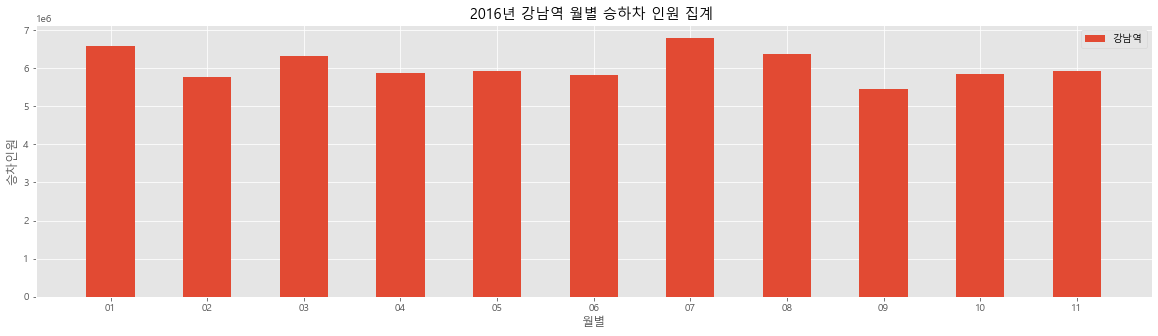

In [115]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(20,5))
    p1 = plt.bar(graph.index, graph.values, width=0.5)
    plt.xlabel("월별")
    plt.ylabel("승차인원")
    plt.title("2016년 강남역 월별 승하차 인원 집계 ")
    plt.legend(p1, ["강남역"])
    plt.show()

In [129]:
승차 = df.query("구분 == '승차'")

In [131]:
승차.tail()

,날짜,구분,역이름,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
73585,2016-11-30,승차,합정,307,710,2345,2870,1660,1225,1117,...,1600,2311,4054,2769,2042,2785,2796,1556,276,1
73586,2016-11-30,승차,혜화,147,315,763,1053,958,1227,2131,...,3927,4407,5486,3309,3063,5154,5064,1847,369,0
73587,2016-11-30,승차,홍대입구,975,1103,3346,4065,2537,1896,2100,...,4079,5054,6932,5278,5468,6655,7607,3918,677,1
73588,2016-11-30,승차,홍제,399,979,3285,3761,2066,1271,1143,...,1137,1542,1533,887,715,660,466,231,30,0
73589,2016-11-30,승차,회현,114,159,239,361,500,792,1243,...,3525,4973,6277,3058,2351,1750,1185,423,73,0


In [132]:
승차.groupby(['역이름']).agg("sum").apply(lambda x : sum(x), axis=1).sort_values(ascending=True)[:15]

역이름
도림천      342988
지축       448999
신답       452368
남태령      535868
용두       757759
용답       859606
동작       915678
학여울     1035347
무악재     1420888
삼각지     1644328
잠원      1904728
오금      2264278
도곡      2361881
양천구청    2401776
경찰병원    2512254
dtype: int64